<a href="https://colab.research.google.com/github/SebasMore07/SistemasDyC/blob/main/Talleres/Taller_5_Grupo_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 5
# Integrantes: Esteban Lizardo Malte Ruano, Sebastián Moreno Rincon.

##  Código para el Ejercicio 1 – Controlador PI

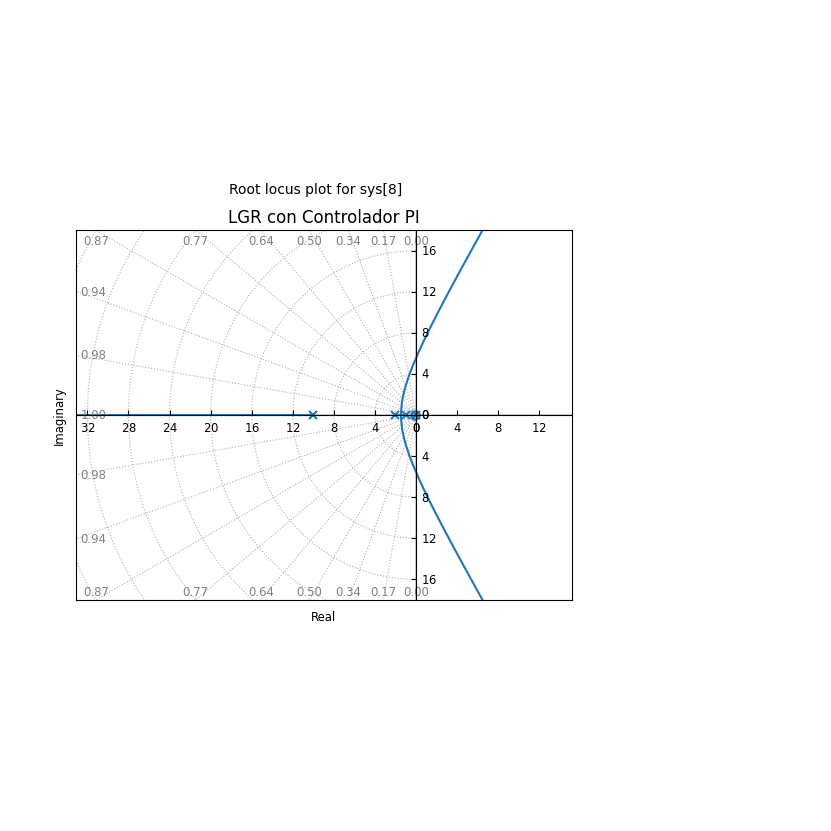

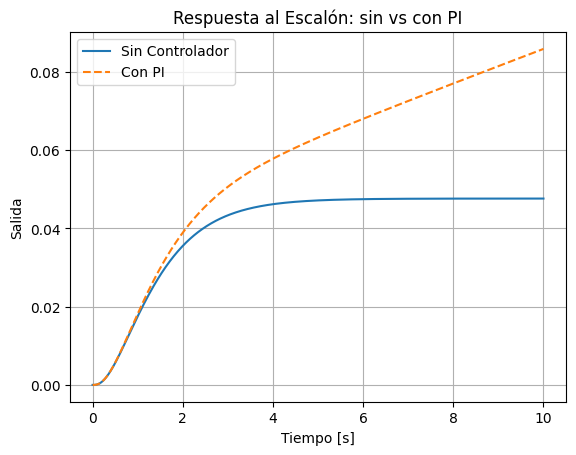

Desempeño sin controlador:
{'RiseTime': np.float64(2.4092301544848462), 'SettlingTime': np.float64(4.386034383805746), 'SettlingMin': np.float64(0.042873347405874306), 'SettlingMax': np.float64(0.047619047619047616), 'Overshoot': 0, 'Undershoot': 0, 'Peak': np.float64(0.0474830657600549), 'PeakTime': np.float64(6.115738084461533), 'SteadyStateValue': np.float64(0.047619047619047616)}

Desempeño con controlador PI:
{'RiseTime': np.float64(458.02617135761625), 'SettlingTime': np.float64(806.8750352029452), 'SettlingMin': np.float64(0.9001261650564139), 'SettlingMax': np.float64(1.0), 'Overshoot': 0, 'Undershoot': 0, 'Peak': np.float64(0.9990409346393908), 'PeakTime': np.float64(1440.045805419323), 'SteadyStateValue': np.float64(1.0)}


In [3]:
# Ejecuta esto en Google Colab

!pip install control --quiet

import numpy as np
import matplotlib.pyplot as plt
from control import tf, feedback, rlocus, step_response
from control.matlab import stepinfo

# Planta
Gp = tf([1], np.polymul([1,1], np.polymul([1,2], [1,10])))

# Controlador PI: (s + 0.1)/s
Gc = tf([1, 0.1], [1, 0])

# Lazo abierto con PI
G_open_PI = Gc * Gp

# Sistemas en lazo cerrado
G_sin_control = feedback(Gp, 1)
G_con_control = feedback(G_open_PI, 1)

# Respuesta al escalón
t = np.linspace(0, 10, 1000)
t1, y1 = step_response(G_sin_control, t)
t2, y2 = step_response(G_con_control, t)

# LGR
plt.figure()
rlocus(G_open_PI)
plt.title("LGR con Controlador PI")
plt.grid(True)

# Respuesta al escalón
plt.figure()
plt.plot(t1, y1, label="Sin Controlador")
plt.plot(t2, y2, label="Con PI", linestyle='--')
plt.title("Respuesta al Escalón: sin vs con PI")
plt.xlabel("Tiempo [s]")
plt.ylabel("Salida")
plt.grid(True)
plt.legend()
plt.show()

# Info de desempeño
info_sin = stepinfo(G_sin_control)
info_con = stepinfo(G_con_control)

print("Desempeño sin controlador:")
print(info_sin)
print("\nDesempeño con controlador PI:")
print(info_con)


## Código para el Ejercicio 3 – Controlador PD

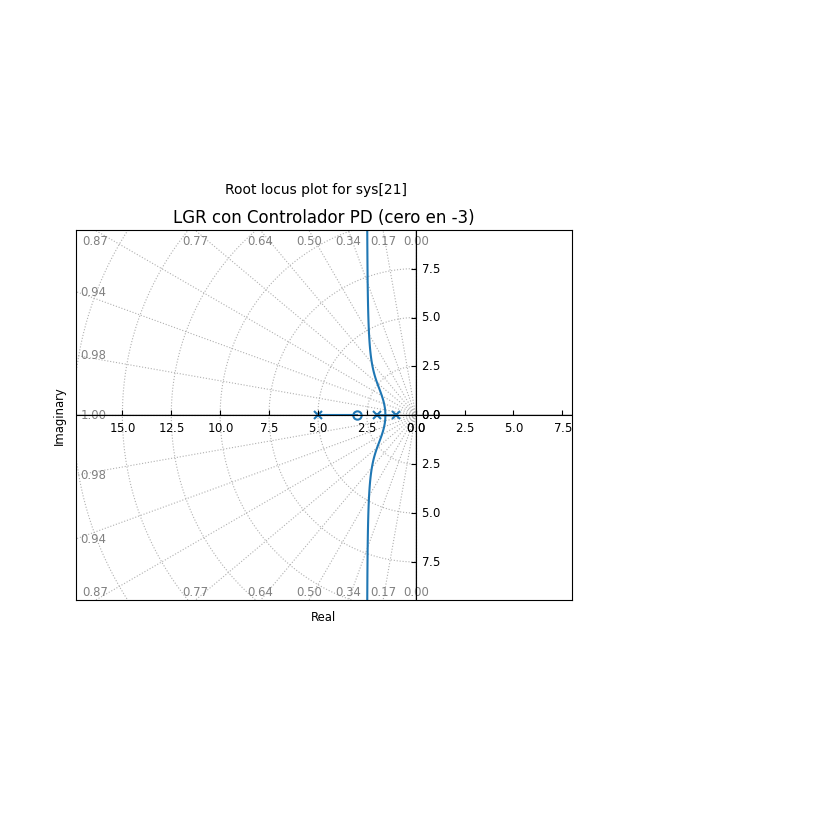

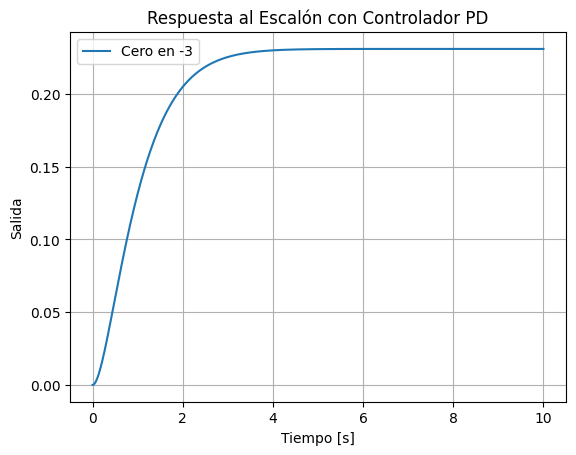

Desempeño con PD (cero en -3):
{'RiseTime': np.float64(1.8237173467976457), 'SettlingTime': np.float64(3.134514189808454), 'SettlingMin': np.float64(0.20856376534717982), 'SettlingMax': np.float64(0.23076923076923078), 'Overshoot': 0, 'Undershoot': 0, 'Peak': np.float64(0.23027592313539352), 'PeakTime': np.float64(4.359824282188122), 'SteadyStateValue': np.float64(0.23076923076923078)}


In [4]:
# Ejecuta esto en Google Colab

import numpy as np
import matplotlib.pyplot as plt
from control import tf, feedback, rlocus, step_response
from control.matlab import stepinfo

# Planta
Gp = tf([1], np.polymul([1,1], np.polymul([1,2], [1,5])))

# Cambiar este valor según el cero del PD
z = 3  # ← reemplaza con 2, 3 o 4

# Controlador PD con cero en -z
Gc = tf([1, z], [1])

# Lazo abierto
G_open_PD = Gc * Gp

# Lazo cerrado
G_closed = feedback(G_open_PD, 1)

# Respuesta al escalón
t = np.linspace(0, 10, 1000)
t_pd, y_pd = step_response(G_closed, t)

# LGR
plt.figure()
rlocus(G_open_PD)
plt.title(f"LGR con Controlador PD (cero en -{z})")
plt.grid(True)

# Escalón
plt.figure()
plt.plot(t_pd, y_pd, label=f"Cero en -{z}")
plt.title("Respuesta al Escalón con Controlador PD")
plt.xlabel("Tiempo [s]")
plt.ylabel("Salida")
plt.grid(True)
plt.legend()
plt.show()

# Desempeño
info_pd = stepinfo(G_closed)
print(f"Desempeño con PD (cero en -{z}):")
print(info_pd)


## Punto obligatorio

Función de transferencia de la planta Gp(s):
<TransferFunction>: sys[27]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


          1
----------------------
s^3 + 6 s^2 + 11 s + 6

Función de transferencia del controlador PID Gc(s):
<TransferFunction>: sys[28]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


29.83 s^2 + 74.99 s + 39.26
---------------------------
          1.345 s

Función de transferencia en lazo cerrado:
<TransferFunction>: sys[31]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


           29.83 s^2 + 74.99 s + 39.26
--------------------------------------------------
1.345 s^4 + 8.07 s^3 + 44.63 s^2 + 83.06 s + 39.26



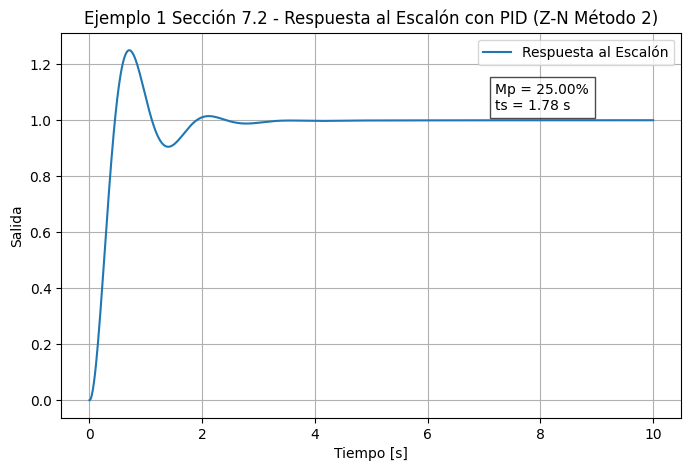

In [5]:
# Ejemplo 1 Sección 7.2 - Sintonización de PID método Ziegler-Nichols 2
# JEAC + Adaptación por ChatGPT
!pip install control
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

# Definición de la planta
num_plant = [1]
den_plant = np.polymul([1,1], np.polymul([1,2], [1,3]))
Gp = tf(num_plant, den_plant)

print("Función de transferencia de la planta Gp(s):")
print(Gp)

# Constantes del controlador PID obtenidas del ejemplo
Kp = 39.26
Ti = 1.345
Td = 0.565

# Definición del controlador PID en la forma:
# Gc(s) = Kp * (1 + 1/(Ti*s) + Td*s)
num_pid = Kp * np.polymul([Td, 1], [Ti, 1])
den_pid = [Ti, 0]

Gc = tf(num_pid, den_pid)

print("Función de transferencia del controlador PID Gc(s):")
print(Gc)

# Sistema en lazo cerrado con realimentación unitaria
# FTLC = (Gc * Gp) / (1 + Gc * Gp)
FT_open_loop = series(Gc, Gp)
FT_closed_loop = feedback(FT_open_loop, 1)

print("Función de transferencia en lazo cerrado:")
print(FT_closed_loop)

# Simulación de respuesta al escalón
t = np.linspace(0, 10, 1000)
y, t = step(FT_closed_loop, t)

# Cálculo del sobreimpulso máximo (Mp)
# Mp = (Valor máximo de salida - Valor final de salida) / Valor final de salida * 100%
y_final = y[-1] # Asumimos que el valor final es el último valor
Mp = (np.max(y) - y_final) / y_final * 100

# Cálculo del tiempo de establecimiento (ts)
# Usamos una tolerancia del 2%
tol = 0.02
# Encontrar los índices donde la respuesta está fuera de la banda de tolerancia
idx_ts = np.where(np.abs(y - y_final) > tol * abs(y_final))[0]
# El tiempo de establecimiento es el último tiempo donde la respuesta estuvo fuera de la tolerancia
if len(idx_ts) == 0:
    ts = 0  # Si no hay índices, la respuesta ya está estable
else:
    ts = t[idx_ts[-1]]

# Gráfica
plt.figure(figsize=[8,5])
plt.plot(t, y, label='Respuesta al Escalón')
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida')
plt.title('Ejemplo 1 Sección 7.2 - Respuesta al Escalón con PID (Z-N Método 2)')
plt.grid()
plt.legend()

# Añadir texto con el valor de Mp y ts en el gráfico
textstr = '\n'.join((
    f'Mp = {Mp:.2f}%',
    f'ts = {ts:.2f} s'))
plt.gca().text(0.7, 0.8, textstr, transform=plt.gca().transAxes,
               fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

## Código para el Ejercicio 5

In [6]:
import numpy as np

def encontrar_raices(coeficientes):
  """
  Encuentra las raíces de un polinomio dado sus coeficientes.

  Args:
    coeficientes: Una lista o arreglo numpy de los coeficientes del polinomio
                  en orden descendente (del término de mayor grado al independiente).
                  Por ejemplo, para el polinomio 2x^2 + 3x - 5, los coeficientes
                  serían [2, 3, -5].

  Returns:
    Un arreglo numpy con las raíces del polinomio.
  """
  raices = np.roots(coeficientes)
  return raices
# Otro ejemplo:
# Para el polinomio x^3 + 2x^2 - x - 2 = 0, los coeficientes son [1, 2, -1, -2]
coeficientes_ejemplo2 = [1, 19, 109, 188]
raices_encontradas2 = encontrar_raices(coeficientes_ejemplo2)
print("Las raíces del polinomio son:", raices_encontradas2)

Las raíces del polinomio son: [-9.9291423  -5.81447213 -3.25638557]
